# MAG-10

In [1]:
import pandas as pd
import xgi
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors
from matplotlib import colors
import matplotlib

plt.rcParams.update({
    'font.family': 'sans-serif',
    'font.size': 10,
    'axes.titlesize': 12,
    'axes.labelsize': 10,
    'xtick.labelsize': 9,
    'ytick.labelsize': 9,
    'savefig.bbox': 'tight',
    'savefig.transparent':True})

In [2]:
mag10 = pd.read_pickle("derived_data/hlrc_hfrc.pkl")
mag10.head()

,edges,conference,hlrc,hfrc
0,"[36025, 36026, 36027, 36028]",NeurIPS,0.045290,-19
1,"[1985, 3478, 5995, 36947]",SIGMOD,-0.139507,-141
2,"[18731, 18733, 80535, 80536, 80537, 80538, 80539]",ICCV,0.684524,2
3,"[33963, 33964]",WWW,1.000000,2
4,"[2732, 13887, 15342, 19856]",CVPR,-0.621444,-77


## HLRC by Conference

In [3]:
mag10_cfrn_hlrc = (
    mag10.groupby("conference", as_index=False)["hlrc"]
    .median()
    .sort_values("hlrc")
)
sorted_conference = mag10_cfrn_hlrc["conference"].tolist()

cmap = matplotlib.colormaps.get_cmap('RdYlBu_r')
norm = colors.Normalize(
    vmin=mag10_cfrn_hlrc['hlrc'].min(),
    vmax=mag10_cfrn_hlrc['hlrc'].max()
)
mag10_cfrn_hlrc['color'] = mag10_cfrn_hlrc['hlrc'].map(lambda x: cmap(norm(x)))

palette = dict(zip(sorted_conference, mag10_cfrn_hlrc['color']))

/tmp/ipykernel_1131140/2323652996.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=mag10, x="conference", y="hlrc", order=sorted_conference,palette=palette);


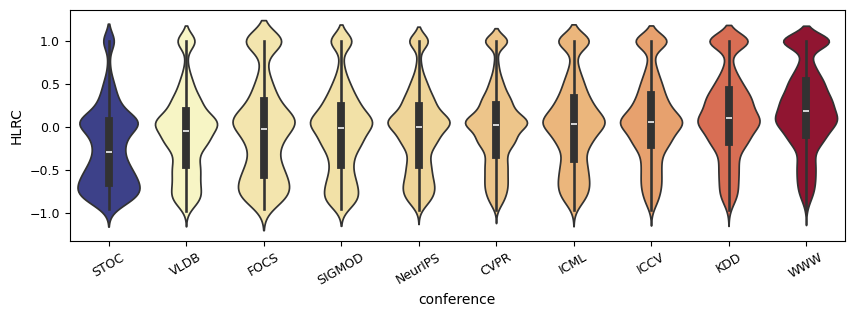

In [4]:
plt.figure(figsize=(10, 3))
sns.violinplot(data=mag10, x="conference", y="hlrc", order=sorted_conference,palette=palette);
plt.xticks(rotation=30);
plt.ylabel("HLRC")
plt.savefig("./figures/MAG10_HLRC_by_conference.pdf",bbox_inches='tight');

## HFRC by Conference

In [11]:
mag10_cfrn_hfrc = (
    mag10.groupby("conference", as_index=False)["hfrc"]
    .median()
    .sort_values("hfrc")
)
sorted_conference = mag10_cfrn_hfrc["conference"].tolist()

cmap = matplotlib.colormaps.get_cmap('RdYlBu_r')
norm = colors.Normalize(
    vmin=mag10_cfrn_hfrc['hfrc'].min(),
    vmax=mag10_cfrn_hfrc['hfrc'].max()
)
mag10_cfrn_hfrc['color'] = mag10_cfrn_hfrc['hfrc'].map(lambda x: cmap(norm(x)))

palette = dict(zip(sorted_conference, mag10_cfrn_hfrc['color']))

/tmp/ipykernel_3872693/4197321275.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=mag10, x="conference", y="hfrc", order=sorted_conference,palette=palette);


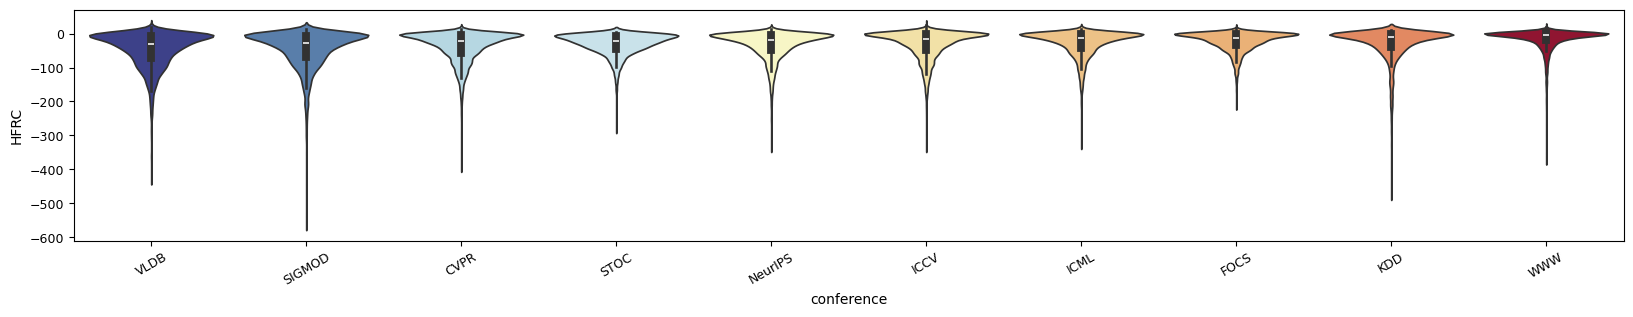

In [12]:
plt.figure(figsize=(20, 3))
sns.violinplot(data=mag10, x="conference", y="hfrc", order=sorted_conference,palette=palette);
plt.xticks(rotation=30);
plt.ylabel("HFRC")
plt.savefig("./figures/MAG10_HFRC_by_conference.pdf",bbox_inches='tight');

# One-hop

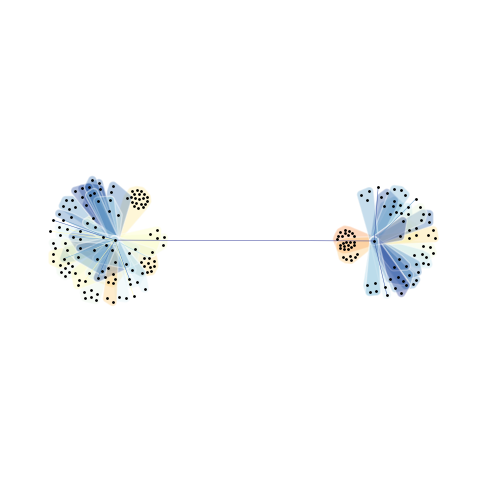

In [5]:
# 1. authors index in the most negative edge (indexing starts from 1)
edge = mag10.sort_values("hlrc").iloc[0,]["edges"]
targets = set(edge)

# 2. authors collaborated with those in the most negative edge
one_hop_mask = mag10['edges'].apply(lambda lst: bool(set(lst) & targets))
one_hop = mag10[one_hop_mask]

H = xgi.Hypergraph(one_hop['edges'].to_list())
node_pos = xgi.pairwise_spring_layout(H, seed=123, iterations=100)
cmap = matplotlib.colormaps.get_cmap('RdYlBu_r')
edge_color = {key: cmap((hlrc+1)/2) for key, hlrc in enumerate(one_hop['hlrc'])}

fig, ax = plt.subplots(figsize=(6,6))
xgi.draw( H, pos=node_pos, node_size=1, node_ec = "black", node_fc = 'black',
    edge_fc= edge_color,  edge_ec= "white", dyad_color=edge_color, # edge with size 2 color
    dyad_style="-", dyad_lw=0.35, alpha=0.4,
    hull = True, radius = 0.02, rescale_sizes=True);
plt.savefig('figures/one-hop.pdf')

## Stats

In [9]:
import sys
import os
sys.path.append(os.path.abspath('/work/users/s/h/shiyi/hypergraph_with_curvature/code/src'))
from util import *

In [10]:
edges = mag10['edges'].to_list()
node_neigh = nodes_neighbors(edges)
neigh_size_dict = compute_neighborhood_sizes(edges, node_neigh)
neigh_df = pd.DataFrame.from_dict(neigh_size_dict,orient='index',
                                  columns=['common_neighbors', 'max_neighborhood_size', 'min_neighborhood_size'])

In [12]:
mag10_v2 = mag10.join(neigh_df)
mag10_v2.sort_values('hlrc').head(10)

,edges,conference,hlrc,hfrc,common_neighbors,max_neighborhood_size,min_neighborhood_size
12940,"[259, 3848]",VLDB,-0.981015,-94,0,127,90
32790,"[4323, 8193]",CVPR,-0.974269,-110,0,127,56
19047,"[1193, 3293]",ICCV,-0.970230,-75,0,78,59
24370,"[1252, 4022]",VLDB,-0.970172,-49,0,73,62
41583,"[5691, 11095]",CVPR,-0.970158,-65,0,106,49
17804,"[494, 2744]",VLDB,-0.969795,-76,0,112,47
41702,"[2263, 3593]",KDD,-0.969421,-81,0,68,63
20189,"[375, 7046]",WWW,-0.968098,-63,0,109,44
42713,"[1795, 6576]",KDD,-0.967234,-47,0,76,51
14517,"[1331, 5726]",NeurIPS,-0.967048,-76,0,71,53
